# README

Este projeto, seguirar uma metodologia diferente dos demais anteriores a este, será feito baseado em um projeto de outro aluno(a), 
no caso este link(). Por fim, terá no meu respositório dois notebook, o que segue o da minha colega mais uma reflexão quando 
descordar do caminho tomado ou desenvolvido mais subjetivo, não que eu seja voz da razão, sei que aprenderei muito com ela. 
Por último, um notebook final, que será mais enchuto, por ser construído após a aula do professor Meigram! 

# 0.0 imports

In [1]:

#dataprocess
import pandas                                   as pd
import numpy                                    as np
import re
import inflection

# Gráficos
import seaborn                                  as sns
import matplotlib.pyplot                        as plt
from plotly             import express          as px
# processamento
from sklearn            import decomposition    as dd
import umap.umap_                               as umap
from sklearn            import manifold         as mn
from sklearn            import ensemble         as en
from sklearn            import cluster          as c
#metrics
from sklearn            import metrics          as m
from sklearn.metrics    import silhouette_score

from sklearn            import mixture          as mx
from scipy.cluster      import hierarchy        as hc


from yellowbrick.cluster  import KElbowVisualizer, SilhouetteVisualizer
from IPython.core.display import HTML

/home/win/.cari/venv/jupyter/4.2.4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 0.1 Help fucntion

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()




%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. Load Dataset 

In [3]:
df = pd.read_csv('/home/win/Documentos/pa05/data/Ecommerce.csv', encoding='latin1')


In [4]:
# Analisando os dados 
df.head()


InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55     17850.0  United Kingdom         NaN
1    536365     71053                  WHITE METAL LANTERN         6   29-Nov-16       3.39     17850.0  United Kingdom         NaN
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75     17850.0  United Kingdom         NaN
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16       3.39     17850.0  United Kingdom         NaN
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16       3.39     17850.0  United Kingdom         NaN

In [5]:
df['Unnamed: 8'].unique()

array([nan])

* coluna 'Unnamed: 8' deve ser dropada!

In [6]:
df.drop(columns = 'Unnamed: 8',  inplace = True)

# 2. Data Description

**Contexto**

Dados de comércio Eletrônico

**Conteúdo**

Este é um conjunto de dados transnacional que contém todas as transações que ocorrem entre 01/12/2010 e 09/12/2011 para um varejo on-line sem loja com sede no Reino Unido e registrado. A empresa vende principalmente presentes exclusivos de todas as ocasiões. Muitos clientes da empresa são atacadistas.

fonte: https://archive.ics.uci.edu/dataset/502/online+retail+ii

                            **Attribute Description**

InvoiceNo:    Número da fatura (um número integral de 6 dígitos atribuído exclusivamente a cada transação)

StockCode:    Código do produto (item)

Description:  Product (item) name

Quantity:     As quantidades de cada produto (item) por transação

InvoiceDate:  O dia em que cada transação foi gerada

UnitPrice:    Preço unitário (Preço do produto por unidade)

CustomerID:   Número do cliente (ID exclusivo atribuído a cada cliente)

Country:      Nome do país (O nome do país onde cada cliente reside)

Analysis tasks to be performed:

Use the clustering methodology to segment customers into groups:



| Nome variável       | Papel     | Tipo | Descrião do produto | Unidades de Ações | Valores perdidos|
|--------------|-----------|------------|------------|------------|------------|
| InvoiceNo (em voz) | ID     | Categorial   | um número integral de 6 dígitos atribuído exclusivamente a cada transação. **Se este código começar com a letra 'c', indica um cancelamento**|| No|
| Cod,o do stock     | ID     | Categorial       |um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto|| No|
|Description|	Feature|	Categorical|	product name|		|no|
|Quantity	|Feature|	Integer|	the quantities of each product (item) per transaction|		|no|
|InvoiceDate	|Feature	|Date|	the day and time when each transaction was generated|		|no|
|UnitPrice	|Feature	|Continuous	|product price per unit	|sterling|	no|
|CustomerID|Feature|Categorical|um número integral de 5 dígitos atribuído exclusivamente a cada cliente|	|no|
|Country|	Feature|	Categorical|	the name of the country where each customer resides|		|no|

| Item         | Price | # In stock |
|--------------|:-----:|-----------:|
| Juicy Apples |  1.99 |        739 |
| Bananas      |  1.89 |          6 |

## 2.1 Rename Columns

In [7]:
list(df.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [8]:
cols_old = list(df.columns)

snakecase = lambda x : inflection.underscore( x )
cols_new = list(map(snakecase, cols_old))

df.columns = cols_new


## 2.2 Data Dimensions

In [9]:
print('Number of Rows: {}'.format( df.shape[0]))
print('Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 541909
Number of Cols: 8


## 2.3 Data Types

In [10]:
df.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [11]:
df['invoice_no'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

* coluna invoice_no, deve mudar seu tipo para int64

## 2.4 Check NA

In [12]:
df.isna().sum() 

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

In [13]:
(df.isna().sum() / 541909 ) *100

invoice_no       0.000000
stock_code       0.000000
description      0.268311
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.926694
country          0.000000
dtype: float64

REFLEXÃO p/ trabalhar com os NANs

**Objetivo do trabalho:** Usa a metodologia de clustering para segmentar clientes em grupos! 

Formas de tratar os NAN:

    * Deletar ( df.dropna() )
        * + (vantagem        -  Simples
        * - (Desvantagem )   -  Perda de informação
        * Goal               -  Depende da quantidade 
   
    * Preencher
        * + (vantagem        -  Mantém o tamanho original dos dados
        * - (Desvantagem )   -  Caso a distribuição n seja normal, pode fica com muito viés!
        * Goal               -  Atrapalharia na segmentação e interpretação do cliente!
    
    * Interpolar
        * + (vantagem        -  Mantém a integridade de seres temporais 
        * - (Desvantagem )   -  Pode distorcer com informações falsas
        * Goal               -  Segmentar o cliente errado no grupo, pois o mesmo pode aparecer mais de uma vez, com uma pequenas  diferança nas suas características.
    
    * Modelos Estatísticos
        * + (vantagem        -  Abordagem mais sofisticada 
        * - (Desvantagem )   -  Reque muito recurso do computador e pode ser impreciso
        * Goal               -  Pode acumular muita informação incorreta!

Conclusão: Melhor caminho, baseado na quantidade máximo de perda é 25% da informação.

## 2.5 Fillout NAN ou Null

colunas com NA description, customer_id

In [14]:
df.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6    29-Nov-16        2.55      17850.0  United Kingdom
1     536365      71053                  WHITE METAL LANTERN         6    29-Nov-16        3.39      17850.0  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8    29-Nov-16        2.75      17850.0  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6    29-Nov-16        3.39      17850.0  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6    29-Nov-16        3.39      17850.0  United Kingdom

In [15]:
df['description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [16]:
df['customer_id'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

##### Qual seria o plano
    * customer_id - O id, ele traz uma identificação do cliente, contudo
    * description - pode subtituir por "sem comentário"



###### Tentativa 1 ( X )

In [17]:
df1 = df.dropna()

In [18]:
df1.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [19]:
print('Foi removido: {:.2f}'.format(1-(df1.shape[0]/df.shape[0])))

Foi removido: 0.25


###### Tentativa 2

In [20]:
#df_missing     = df.loc[df1['customer_id'].isna(), :]
#df_not_missing = df.loc[~df1['customer_id'].isna(), :]

#create reference
#df_backup = pd.DataFrame(df_missing['invoice_no']).drop_duplicates()
#df_backup['customer_id'] = np.arange(19000, 19000 + len(df_backup), 1)

#merge original with reference dataframe
#df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce 
#df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

#drop extra columns
#df1 = df1.drop(columns=['customer_id_x', 'customer_id_y'], axis=1)
#df1.head()


## 2.7 Change Type

In [21]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [22]:
df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6    29-Nov-16        2.55      17850.0  United Kingdom
1     536365      71053                  WHITE METAL LANTERN         6    29-Nov-16        3.39      17850.0  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8    29-Nov-16        2.75      17850.0  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6    29-Nov-16        3.39      17850.0  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6    29-Nov-16        3.39      17850.0  United Kingdom

In [23]:
# invoice_no
#df1['invoice_no']   = df1['invoice_no'].astype( int ) 

#invoice date
df1.loc[:, 'invoice_date'] = pd.to_datetime(df1.loc[:,'invoice_date'], format= '%d-%b-%y') 

#customer id
df1.loc[:, 'customer_id'] = df1.loc[:, 'customer_id'].astype(int)
df1.dtypes



invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

 ## 2.7 Descriptive Statistics

In [24]:
num_attributes = df1.select_dtypes( include = ['int64', 'int32', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'int32', 'float64', 'datetime64[ns]'] )

## 2.7.1 Numerical Attributes

In [25]:
#central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion 
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m1 = pd.concat([d2 ,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m1 = m1.drop([2])
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]
m1


attributes      min      max     range       mean  median         std        skew       kurtosis
0    quantity -80995.0  80995.0  161990.0  12.061303    5.00  248.693064    0.182663   94317.563673
1  unit_price      0.0  38970.0   38970.0   3.460471    1.95   69.315077  452.219019  246924.542988

## 2.7.2 Categorical Attributes

In [26]:
cat_attributes.head()

invoice_no stock_code                          description         invoice_date         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER  2016-11-29 00:00:00  United Kingdom
1     536365      71053                  WHITE METAL LANTERN  2016-11-29 00:00:00  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER  2016-11-29 00:00:00  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE  2016-11-29 00:00:00  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.  2016-11-29 00:00:00  United Kingdom

In [27]:
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]

#check if the number of invoices that contains letters are igual with negative quantity
print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0])))



Total number of invoices: 8905
Total number of negative quantity: 8905


**Stock code**

In [28]:
cat_attributes.loc[cat_attributes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), 'stock_code']

45        POST
141          D
386       POST
1123      POST
2239         M
2250         M
5073      POST
5258      POST
5325      POST
5369      POST
6602      POST
6676      POST
6798         M
6973      POST
7139      POST
7237      POST
7290      POST
7953      POST
7976         M
8530         M
8587         M
8588         M
9038         D
9300      POST
9305      POST
9326         M
9441      POST
9575         M
9734      POST
10113        M
11479     POST
11501     POST
12423        M
12667        M
12783        M
13052     POST
13954        M
14166     POST
14254     POST
14472     POST
14498        D
17046     POST
17290     POST
18136        M
18184        M
18186        M
18333     POST
19392        D
19792     POST
19818     POST
19838     POST
19911     POST
19978     POST
19992     POST
20036     POST
20094     POST
21553     POST
21758        M
21838        M
22582     POST
23273     POST
24049     POST
27285     POST
28007        M
29018     POST
29090        M
29530     

In [29]:
df1.loc[cat_attributes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :].head()

invoice_no stock_code description  quantity         invoice_date  unit_price  customer_id         country
45       536370       POST     POSTAGE         3  2016-11-29 00:00:00       18.00      12583.0          France
141     C536379          D    Discount        -1  2016-11-29 00:00:00       27.50      14527.0  United Kingdom
386      536403       POST     POSTAGE         1  2016-11-29 00:00:00       15.00      12791.0     Netherlands
1123     536527       POST     POSTAGE         1  2016-11-29 00:00:00       18.00      12662.0         Germany
2239     536569          M      Manual         1  2016-11-29 00:00:00        1.25      16274.0  United Kingdom

## 2.8 Feature Creation Essencia RMF

In [30]:
#df1['quantity'] = df1['quantity'].astype(float)
# Gross Revenue ( Faturamento ) quantity * price
df_reff = df1[['customer_id']].drop_duplicates( ignore_index =  True)

df1['gross_revenue'] = df1['quantity'] * df1['unit_price']

#df1['invoice_date'] = pd.to_datetime(d_recency['invoice_date'])
#Monetary
d_monetary  =  df1[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()

df_reff     =  pd.merge( df_reff, d_monetary, on = 'customer_id', how = 'left')

# Recency - Last day purchase
#d_recency = df1.loc[:,['customer_id', 'invoice_date']].groupby( 'customer_id').max().reset_index()
d_recency = df1[['customer_id', 'invoice_date']].groupby( 'customer_id').max().reset_index()
d_recency['invoice_date'] = pd.to_datetime(d_recency['invoice_date'])
#d_recency['recency_days'] = (df1.invoice_date.max() - d_recency.invoice_date ).dt.days

d_recency['recency_days'] = (df1['invoice_date'].max() - d_recency['invoice_date'] ).dt.days

d_recency = d_recency[['customer_id', 'recency_days']].copy()
#d_recency['invoice_date'] = pd.to_datetime(d_recency['invoice_date'])
df_reff   = pd.merge(df_reff, d_recency, on = 'customer_id', how =  'left')

# Frequency
df_freq = df1[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_reff  = pd.merge( df_reff, df_freq, on = 'customer_id', how = 'left')

# Prof. chamou de Avg Ticket 
    # para mim faz mais sentido chamar de avg_per_purchase, que vem de average spent per purchase
    # média gasta por compra
df_avg_purchase=df1[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename( columns = {'gross_revenue':'avg_per_purchase'})
df_reff = pd.merge( df_reff, df_avg_purchase, on = 'customer_id', how = 'left' )
df_reff.head()

/tmp/ipykernel_299278/2385408937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gross_revenue'] = df1['quantity'] * df1['unit_price']


customer_id  gross_revenue  recency_days  invoice_no  avg_per_purchase
0      17850.0        5288.63           302          35         16.950737
1      13047.0        3079.10            31          18         15.709694
2      12583.0        7187.34             2          18         28.634821
3      13748.0         948.25            95           5         33.866071
4      15100.0         635.10           330           6        105.850000

In [68]:
print(type(df_reff  ))


<class 'pandas.core.frame.DataFrame'>


# 3.0 Filter Variables

# 4.0 Features Engineering

In [ ]:
#year


# Convertendo a coluna para o formato datetime
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# .dt para extrair o ano, M
df3['year'] = df3['invoice_date'].dt.year


# month
df3['month'] = df3['invoice_date'].dt.month

df3['month_sin'] = df3['month'].apply(lambda x: np.sin( x* (2. * np.pi/12) ) )
df3['month_cos'] = df3['month'].apply(lambda x: np.cos( x* (2. * np.pi/12) ) )

In [ ]:
df3.head()

In [ ]:
cancelled = df3[df3['quantity'] < 0]
cancelled.head()

In [ ]:
df.head()

In [ ]:
df[df['description'].str.contains(',', na=False)]



**É importante resaltar o que já até aqui para mim ficou evidente, primeiro, quando um item é cancelado a fatura tem a letra C e 
quantity é negativo. Segundo, e mais interressante, na coluna 'description' cada linha tem único pedido, mesmo quando há virgulas, é 
uma descrição a mais, portanto, na coluna unit_price aquele preço se relaciona ao pedido descrito pela coluna 'description'.**

In [ ]:


#df3['gross_revenue'] = df3['quantity'].apply(lambda x: df3.loc[:,'quantity'] * df3.loc[:,'unit_price'] if x > 0 else 0)
# Observe que se produto retorna de algum lugar claro que tem um custo, mas não tenho informação para estimar,
#por isso ele é zero!

df3['gross_revenue'] = np.where(df3['quantity'] > 0, df3['quantity'] * df3['unit_price'], 0)

#df3['gross_revenue'] = np.where(df3['gross_revenue'] == 0, df3['quantity'] * df3['unit_price'] ) adicionar o valor do gasto ao pacote
#cancelado

**Conjunto New Features**

In [ ]:
# Cojunto New Features
purchases = df3[df3['quantity'] > 0]
#Monetary
df_monetary = purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_monetary 

In [ ]:
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref

In [ ]:
df3['returned'] = np.where(df3['quantity'] < 0, 1, 0)

In [ ]:
df3.head()

In [ ]:
 df3.invoice_date.max()

**Conjunto New Features**

In [ ]:
# Conjunto New Features
filtro =  df3[df3['quantity'] > 0]
df_recency = filtro.loc[:,['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index() # pegando a maior data de cada cliente, que também em linha temporal é 
# mais recente
df_recency['recency_days'] =  (df3.invoice_date.max() - df_recency.invoice_date).dt.days
df_recencyS

In [ ]:
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref

#O calculo será feito com referência a linha temporal dentro do dataset 
 Para calcular a diferença em dias entre uma data em seu conjunto de dados e a data atual, você pode seguir estes passos:


import pandas as pd
from datetime import datetime

#Defina a data presente
data_atual = pd.Timestamp.now()

#Data do conjunto de dados
data_do_dataset = pd.Timestamp('2017-12-07 00:00:00')

#Calcular a diferença em dias
diferenca_em_dias = (data_atual - data_do_dataset).days

print(f'A diferença em dias entre {data_do_dataset} e a data de hoje é de {diferenca_em_dias} dias.')




In [ ]:

#de cada cliente, que também em linha temporal é 
rel = ( df3.invoice_date.max() - df3.invoice_date) 
df3['recency_days'] = rel.dt.days


In [ ]:
df3.isnull().sum()

In [ ]:
df3.shape

In [ ]:
# Quantidade de vezes que o cliente realizou a compra
df_freq = filtro.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns = { 'invoice_no': 'qtde_invoices'})
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how = 'left')
df_ref

In [ ]:
df_freq = filtro.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'qtde_invoices'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

Parece haver um erro na lógica, para calcular a quantidade de vezes que o cliente comprou e selecionando somente as colunas 
['customer_id', 'invoice_no'], terá valores repetido, mas não significa que são duplicadas, pois está observação limitou somente a duas 
colunas que podem se repetir se mesmo cliente comprar no mesmo dia.

In [ ]:
# experimento sem deletar o que parece ser duplicado
ux = df3.loc[:, ['customer_id', 'invoice_no']].groupby('customer_id').count().reset_index()
ux

Observar que o cliente 12347 tem comprado 182 vezes, vamos analisar se suas compras tem linha que são totalmente iguais. 

In [ ]:
p = df[df['customer_id'] == 12347.0]
p # 537626	85116	 BLACK CANDELABRA T-LIGHT HOLDER	12	5-Dec-16	2.10	12347.0	Iceland

Observe que as colunas 'invoice_no' e 'customer_id' as vezes se repete em compras do mesmo dia, isso pode ser devido ser comprado tudo na mesma transação, portando está correto está forma de seguir, a menos que receba uma descrição a mais ao contrário a este pensamento.

In [ ]:
# Quantidade de vezes que o cliente realizou a compra
aux = df3.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns = { 'invoice_no': 'qtde_invoices'})
# Use a função merge para juntar os dataframes, baseando-se na coluna 'customer_id'
df3 = pd.merge( df3, aux, on = 'customer_id', how = 'left')

In [ ]:
#quantidade de items comprados durante todo esse tempo 
# em relação ao original qtde_items se tornou total_items, para ficar mais claro total de items comprado pelo cliente.
df_freq = filtro.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'total_items'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_freq.head(3)

In [ ]:
aux = df3.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'total_items'})

df3 = df3.merge(aux[['customer_id', 'total_items']], on='customer_id', how='left')

In [ ]:
df_freq = filtro.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').count().reset_index().rename(columns={'stock_code':'qtde_products'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.head()

Qual motivo total de items ser diferente da quantidade de produtos, produtos que tem a mesma descrição tem o mesmo 'stock_code' ?

In [ ]:
df.head()

Observe na celula acima que o mesmo produto ele pode ser comprado vários em a mesma compra por isso, ele receberar o mesmo stock_code.
Entretando, a descrição deste no que refere ao título para criação deste tópico está errada, não é quantidade, mas variedade. 
Falta verificar se produtos com a mesma descrição tem o mesmo 'stock_code'.

In [ ]:
a = df[df['description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
a

curiosamente tem-se o mesmo código no stock_code, cuntuto, observando as três primeiras linhas exibidas, as três linhas estão 
iguais exceto pela coluna 'invoice_no', como não foi disponibilizado a hora, teria que solicitar ao time engenharia de dados ou responsáveis, para ter certeza se são ou
não são duplicadas. Contuto, com as informações que temos, tem que mudar o nome de **Quantity of products pychased** para **Variety of products purchased**, e **variety_products** para coluna. Além disso, pode ser que o mesmo cliente tenha comprado o mesmo produto em trasações diferentes.

In [ ]:
aux = df3.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').count().reset_index().rename(columns={'stock_code':'variety_products'})
df3 = df3.merge(aux[['customer_id', 'variety_products']], on='customer_id', how='left')
df_ref.rename(columns={'qtde_products':'variety_products'}, inplace = True )
df3.head()

In [ ]:
# average ticket
df_avg_ticket = filtro.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')

O nome é Volume de tickets, mas calcula a média gasta pelo cliente por pedidos. Então vou renomear para 
avg_per_purchase

In [ ]:
aux = df3.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df3 = df3.merge(aux[['customer_id', 'avg_ticket']], on='customer_id', how='left')
df3.head()

In [ ]:
df_ref.rename(columns = {'avg_ticket':'avg_per_purchase'}, inplace = True)

df3.rename(columns    = {'avg_ticket':'avg_per_purchase'}, inplace = True)

In [36]:
df3.isnull().sum()

NameError: name 'df3' is not defined

In [ ]:
df_ref.isnull().sum()

In [ ]:
#df3.drop(columns = 'avg_ticket_x', axis = 1, inplace = True)

In [ ]:
#df3.rename(columns ={ 'avg_ticket_y': 'avg_ticket'}, inplace = True )

In [ ]:
df_aux = ( filtro[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()


df_aux.head()

In [ ]:
aux = ( df3[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()


aux.head()

In [ ]:
tetha = df3[df3['customer_id'] == 12347.0]
tetha.head(20) 

In [ ]:


# New features
df_aux = ( filtro[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()

# df3
aux = ( df3[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()

In [ ]:
#Frequency
df_aux['frequency'] = df_aux[['buys_', 'days_']].apply(lambda x: x['buys_'] / x['days_'] if x['days_'] !=0 else 0, axis=1)
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left')
df_ref.head()

In [ ]:
#Frequency
aux['frequency'] = aux[['buys_', 'days_']].apply(lambda x: x['buys_'] / x['days_'] if x['days_'] !=0 else 0, axis=1)
df3 = pd.merge(df3, aux[['customer_id', 'frequency']], on='customer_id', how='left')
df3.head()

Vamos analisar a criação desta feature frequency!

Tanto a frequência quanto o perído são grandezas escalares relacionada a movimentos circulares ou repetitivos!
O que é frequêcia ?

* 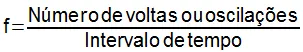!

* Frequência é o número de voltas realizadas por um objeto em movimento circular em um intervalo de tempo determinado.

* Na prática:

    * "Uma unidade de medida muito comum para a frequência é a rotação por minuto (r.p.m). Um objeto que executa um movimento circular  a 60 r.p.m, por exemplo, completa 60 rotações por minuto."

 O que é o período? 
 
 * "O período é o tempo necessário para que um objeto em movimento circular conclua uma volta."

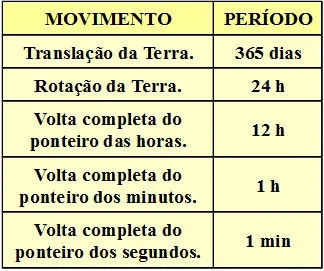!

https://s4.static.brasilescola.uol.com.br/img/2017/04/frequencia.jpg


No caso, ação ou movimento circular é o ato de comprar, o tempo são os dias. Então, a frêquencia que pessoa compra seria quantidade de compras pelo dias. Contuto, não seria mais interressante saber quantos dias a pessoa faz uma compra, no caso um período, já que, se pessoa comprar em 10 dias um total de 10 compras terá a frequência de 10 buy/ 10 day  = 1 buy/day o que significa que ela faz 1 uma compra a cada dia, o que não necessáriamente seja uma verdade,
já que ação dela de comprar, não é algo circular, monótono ela pode ter comprado 8 no dia 1 e dois no dia 10 entre várias opções, **por isso,** não é uma informação útil para construir raciocínio por cima, séria nescessário além da média o desvio padrão.  Por outro lado, é mais 
interressante saber quanto tempo demora para pessoa fazer uma compra, ou quantidade de itens ou produtos que a pessoa faz em uma compra. Mas neste caso, o que autor deste trabalho talvez buscava a informação em média quantos dias para o meu cliente fazer uma compra, para isso, **é só gerar os dias entre intervalos de compra, divídido pelo número de vezes que ele comprou**. O qué de certo modo um período.

intervalo em dias entre os intervalos de compra/ número de vezes que comprou

Entretanto, entraria no mesmo problema falado anteriormente. Vamos então imagina a seguinte situação que nos ajudará a construir uma linha de raciocínio.

**Situação de 3 compras em 10 dias**

observações 1: | significa que fez uma compra, - dia que não houve compra!


    *Primeira: compra nos dia 1, 2 e 10 ||-------|
        * Intervalos                  : 1 e 8
        * Média                       : 5
        * Desvio padrão (populacional): 3,53
        * Desvio padrão (Amostragem)  : 5
        
    *Segunda: compra nos dia 1, 5 e 10 |---|----|
        * Intervalos                  : 4 e 5
        * Média                       : 5
        * Desvio padrão (populacional): 0,71
        * Desvio padrão (Amostragem)  : 1
        
    *Terceira: compra nos dia 1, 9 e 10 |-------||
        * Intervalos                  : 8 e 1
        * Média                       : 5
        * Desvio padrão (populacional): 3,53
        * Desvio padrão (Amostragem)  : 5

Conclusão: eles tem o mesmo número de compras e a mesma quantidade de dia, o que gera a mesma média, contudo, com intervalos diferentes, diante disso, vamos criar uma coluna para média e Desvio padrão (amostragem), assim podemos entender intervalos ou periocidade das compras do cliente.


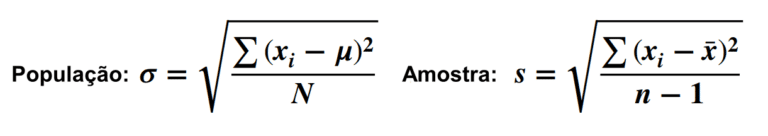

como o que estamos gerando é um tipo de período, e como mostra a imagem o podemos também calcular a frequência através do periodo!

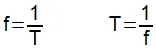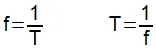

É interressante ressaltar que desvio padrão como mostra a imagem abaixo, é a distância dos valores da média. 

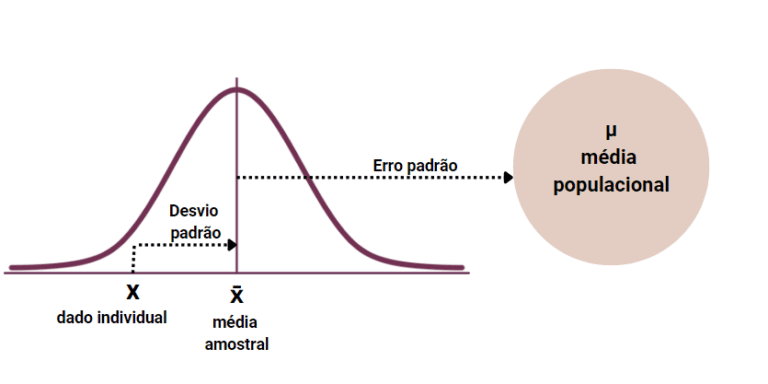!

https://blog.proffernandamaciel.com.br/desvio_erro_padrao/

In [ ]:
# colocando em prática
# New features

# Passo 1 (P1) - colocar as datas em ordem cresente

aux  = df3.loc[:,['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates().groupby(['customer_id','invoice_no'])#.sort_values('invoice_date', ascending = False)

auxr  = filtro.loc[:,['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates().groupby(['customer_id','invoice_no'])#.sort_values('invoice_date', ascending = False)
                                      
# calcula o intervalo  

# média 
# desvio padrão
# inverte para encontrar frequência


In [ ]:
aux.head()



In [ ]:
aux2 = df[['description','customer_id','invoice_date'] ].drop_duplicates() # Problema aqui é que canceladas também vem 
aux2[ aux2['description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
#(df1['customer_id'] == 17850) and 

In [ ]:
aux2 = df[['description','customer_id','invoice_date', 'invoice_no']].drop_duplicates() # Problema aqui é que canceladas também vem 
aux2[ aux2['description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
#(df1['customer_id'] == 17850) and 

In [ ]:
auxr1 = filtro.sort_values(by=['customer_id', 'invoice_date','invoice_no'], ascending=True)
auxr1 = auxr1[['customer_id','invoice_date', 'invoice_no']].drop_duplicates() 
# a coluna é invoice_no é importante para não deletar transações que foram feitas no mesmo dia do mesmo cara só que são diferentes. 
auxr2 = auxr1[['customer_id','invoice_date']]
auxr3 = auxr2.sort_values(by=['customer_id', 'invoice_date'], ascending=True).reset_index()
auxr3.drop(columns = 'index', axis = 1, inplace = True)



aux1 = df3.sort_values(by=['customer_id', 'invoice_date', 'invoice_no'], ascending=True)
aux1 = aux1[['customer_id','invoice_date', 'invoice_no']].drop_duplicates() 
aux2 = aux1[['customer_id','invoice_date']]
aux3 = aux2.sort_values(by=['customer_id', 'invoice_date'], ascending=True).reset_index()
aux3.drop(columns = 'index', axis = 1, inplace = True)
aux3.head(60)

In [ ]:
if aux3.loc[0, 'invoice_date'] == aux3.loc[1 , 'invoice_date']:
    print('são iguais')

In [ ]:
# calcula o intervalo 
#como é um pouco demorodo vou deixar comentado
#contador =  406828
#i = 0 
#while i < 406828:
    # vamos utilizar if para deixar o processo ficando mais leve e direto, n precisando entrar no dataset as vezes!
#    if aux3.loc[i,'customer_id'] == aux3.loc[i+1,'customer_id']: 
        
#        if aux3.loc[i+1, 'invoice_date'] != aux3.loc[i , 'invoice_date']:
            
#            aux3.loc[i,'interval'] = (aux3.loc[i+1,'invoice_date'] - aux3.loc[i,'invoice_date']).days
        
#        else:
#            aux3.loc[i,'interval'] = 0
#    else:
#        aux3.loc[i,'interval'] = 0
#    i = i+1
#for 
#aux2.loc[:'interval'] = aux['invoice_date'].apply(lambda x : ) 


In [ ]:
#aux3.head(60)

In [ ]:
#aux3.isnull().sum()

In [ ]:
#auxr3

In [ ]:
# Código otimizado pelo chat-gpt 3.5
aux4 = aux3#.drop(columns = 'interval', axis = 1)
mask = aux3['customer_id'] == aux3['customer_id'].shift(-1)

interval = (aux3['invoice_date'].shift(-1) - aux3['invoice_date']).dt.days
interval[~mask] = 0
interval[~mask | (aux3['invoice_date'] == aux3['invoice_date'].shift(-1))] = 0

aux4['interval'] = interval


# df_ref
# Código otimizado pelo chat-gpt 3.5
auxr4 = auxr3
mask = auxr3['customer_id'] == auxr3['customer_id'].shift(-1)

interval = (auxr3['invoice_date'].shift(-1) - auxr3['invoice_date']).dt.days
interval[~mask] = 0
interval[~mask | (auxr3['invoice_date'] == auxr3['invoice_date'].shift(-1))] = 0

auxr4['interval'] = interval

 Vamos esclarecer cada parte do código otimizado em detalhes:

1. Na linha 2, `shift(-1)`:
   - `shift(-1)` desloca os valores da série para baixo, com `-1` indicando que estamos deslocando as linhas uma posição para cima.
   - Isso compara se o `customer_id` atual é igual ao `customer_id` deslocado por uma posição para baixo na série de dados. Essa abordagem ajuda a identificar correspondências sequenciais de IDs de clientes.

2. Na linha 3, `interval = (aux3['invoice_date'].shift(-1) - aux3['invoice_date']).dt.days`:
   - Aqui, estamos calculando a diferença de dias entre a `invoice_date` atual e a `invoice_date` deslocada uma posição para baixo.
   - O uso de `shift(-1)` ajuda a obter a data subsequente à atual para calcular o intervalo de dias.

3. Na linha 4, `interval[~mask]`:
   - `~mask` é uma negação booleana, que retorna `True` para os valores onde 'mask' é False e vice-versa.
   - Portanto, `interval[~mask]` seleciona apenas as posições onde o `customer_id` não é igual ao `customer_id` da linha subsequente.

4. Na linha 5, `interval[~mask | (aux3['invoice_date'] == aux3['invoice_date'].shift(-1))] = 0`:
   - `|` é o operador OR bitwise, que atua sobre as máscaras booleanas, permitindo que a condição seja atendida se pelo menos uma das subcondições for verdadeira.
   - Aqui, estamos atribuindo 0 aos valores em `interval` que não satisfazem a condição da máscara ou quando as `invoice_date` atuais são iguais às datas deslocadas por uma posição para baixo.

5. Quanto à linha 6, não está realmente transformando tudo em um dataset. Ela simplesmente adiciona os valores calculados de `interval` ao DataFrame `aux3` na coluna 'interval'.

Espero que isso esclareça o funcionamento do código otimizado. Se tiver mais perguntas ou precisar de mais detalhes, fique à vontade para perguntar!   

In [ ]:
# Vamos verificar se existe alguma diferença entre os métodos
(aux3['interval'] != aux4['interval']).sum()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Comparação entre os resultados
comparison = (aux4['interval'] != aux3['interval']).sum()

# Gerando o gráfico
data = {'Método': ['Meu Método', 'Método Otimizado'],
        'Diferenças': [comparison, comparison]}
df = pd.DataFrame(data)

plt.bar(df['Método'], df['Diferenças'], color=['blue', 'green'])
plt.xlabel('Método Utilizado')
plt.ylabel('Diferenças Encontradas')
plt.title('Contagem de Diferenças entre os Métodos')
plt.show()


In [ ]:
aux3.isnull().sum()

In [ ]:
aux4.isnull().sum()

In [ ]:

# média 
# desvio padrão
# inverte para encontrar frequência

aux5 = aux4[[ 'customer_id', 'invoice_date', 'interval']].groupby(['customer_id']).agg(interval_mean = ('interval', 'mean'),
                                                                            interval_std  = ('interval', 'std'),
                                                                            n_buys = ('customer_id', 'count')).reset_index()
# df_ref
auxr5 = auxr4[[ 'customer_id', 'invoice_date', 'interval']].groupby(['customer_id']).agg(interval_mean = ('interval', 'mean'),
                                                                            interval_std  = ('interval', 'std'),
                                                                            n_buys = ('customer_id', 'count')).reset_index()

aux5

In [ ]:
aux5.isnull().sum()

In [ ]:
# Aproveitando que apredemos a trabalhar um pouco sobre vetores, vamos usar para alterar os Nan's

mask = aux5['interval_std'].isnull()

interval = aux5['interval_std']
interval[mask] = 0
interval[ mask | (aux5['interval_std'] == aux5['interval_std'].isnull)] = 0

aux5['interval_std'] = interval
aux5

#New feactures

mask = auxr5['interval_std'].isnull()

interval = auxr5['interval_std']
interval[mask] = 0
interval[ mask | (auxr5['interval_std'] == aux5['interval_std'].isnull)] = 0

auxr5['interval_std'] = interval

In [ ]:
aux5.isnull().sum()

In [ ]:
aux5.head()

In [ ]:
# Juntando 

#df3.drop(   columns = 'frequency', axis    = 1, inplace = True)
#df_ref.drop(columns = 'frequency', axis    = 1, inplace = True)

#df3 = pd.merge(df3, aux4[['customer_id', 'interval'       ]], on='customer_id', how='left')
df3 = pd.merge(df3, aux5[['customer_id', 'interval_mean'  ]], on='customer_id', how='left')
df3 = pd.merge(df3, aux5[['customer_id', 'interval_std'   ]], on='customer_id', how='left')
df3 = pd.merge(df3, aux5[['customer_id', 'n_buys'          ]], on='customer_id', how='left')

#df_ref = pd.merge(df_ref, auxr4[['customer_id', 'interval'     ]], on='customer_id', how='left')
df_ref = pd.merge(df_ref, auxr5[['customer_id', 'interval_mean']], on='customer_id', how='left')
df_ref = pd.merge(df_ref, auxr5[['customer_id', 'interval_std' ]], on='customer_id', how='left')
df_ref = pd.merge(df_ref, auxr5[['customer_id', 'n_buys'        ]], on='customer_id', how='left')



#df3.head()

In [ ]:
df3.isnull().sum()

In [ ]:
df_returns = cancelled[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtde_returns'})
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1
df_ref = pd.merge(df_ref, df_returns, on='customer_id', how='left')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0


In [ ]:
aux = df3.loc[df3['returned'] == 1, ['customer_id', 'returned']].groupby('customer_id').sum().reset_index().rename( columns = {'returned': 'n_returned'})
aux.head()

In [ ]:
df3 = pd.merge(df3, aux, on='customer_id', how='left')

In [ ]:
df_ref.isnull().sum()

In [ ]:
df3.isnull().sum()

In [ ]:
df3['n_returned'] = df3['n_returned'].apply(lambda x: 0 if x == 'nan' or 'Nan' or 'NAN' or 'NaN' else x)

In [ ]:
df3.isnull().sum()

In [ ]:
ux = ( filtro.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('quantity', 'sum')).reset_index() )
ux.head()

In [ ]:
df3[df3['customer_id'] == 12346 ].head()

Embora seja estranho esse cliente 12346 comprou em um única compra 74215 de único produto, provalvemente ele revende.

In [ ]:
df_aux = ( filtro.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('quantity', 'sum')).reset_index() )

df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], on='customer_id', how='left')



In [ ]:
aux = ( df3.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('quantity', 'sum')).reset_index() )
aux
aux['avg_basket_size'] = aux['n_products'] /  aux['n_purchase']
df3 = pd.merge(df3, aux[['customer_id', 'avg_basket_size']], on='customer_id', how='left')

In [ ]:
df3.head()

Não é quantidade de itens por cesta, mas quantidade de tipos de produto por cesta!

In [ ]:
df_aux = ( filtro.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('stock_code', 'nunique')).reset_index() )

df_aux['avg_product_per_basket'] = df_aux['n_products'] / df_aux['n_purchase']
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_product_per_basket']], on='customer_id', how='left')
df_ref.isna().sum()

In [ ]:
aux = ( filtro.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('stock_code', 'nunique')).reset_index() )

aux['avg_product_per_basket'] = aux['n_products'] / aux['n_purchase']
df3 = pd.merge(df3, aux[['customer_id', 'avg_product_per_basket']], on='customer_id', how='left')
df3.isna().sum()

In [ ]:
df_ref['avg_product_per_basket'] = df_ref['avg_product_per_basket'].apply(lambda x: 0 if x == 'nan' or 'Nan' or 'NAN' or 'NaN' else x)

In [ ]:
df3['avg_product_per_basket'] = df3['avg_product_per_basket'].apply(lambda x: 0 if x == 'nan' or 'Nan' or 'NAN' or 'NaN' else x)

In [ ]:
df_ref.isna().sum()

In [ ]:
df3.isna().sum()

# 5.0 Exploratory Data Analysis

# 6.0 Data Preparation

# 7.0 Hypermarameter Fine-Tunning

In [61]:
# Aproveitando que apredemos a trabalhar um pouco sobre vetores, vamos usar para alterar os Nan's

mask           = df_reff['recency_days'].isnull()

interval       = df_reff['recency_days']
interval[mask] = 0
interval[ mask | (df_reff['recency_days'] == df_reff['recency_days'].isnull)] = 0

df_reff['recency_days'] = interval



/tmp/ipykernel_86738/2800074672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval[mask] = 0
/tmp/ipykernel_86738/2800074672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval[ mask | (df_reff['recency_days'] == df_reff['recency_days'].isnull)] = 0


In [62]:
df_reff.isnull().sum()

customer_id         0
gross_revenue       0
recency_days        0
invoice_no          0
avg_per_purchase    0
dtype: int64

In [63]:
df_reff.iloc[:,1:]

gross_revenue  recency_days  invoice_no  avg_per_purchase
0      5.288630e+03           302          35      1.695074e+01
1      3.079100e+03            31          18      1.570969e+01
2      7.187340e+03             2          18      2.863482e+01
3      9.482500e+02            95           5      3.386607e+01
4      6.351000e+02           330           6      1.058500e+02
5      4.596510e+03            25          20      4.216982e+01
6      5.107380e+03             7          27      1.422669e+01
7      4.627620e+03            16          15      7.230656e+01
8      5.941934e+04             0         118      2.385361e+01
9      7.711380e+03             2          86      7.627478e+00
10     2.005630e+03            87           7      2.993478e+01
11     4.896000e+02           373           1      3.766154e+01
12     5.988300e+02            50           3      1.996100e+01
13     5.099261e+04            38          76      1.861044e+02
14     3.894400e+02           261           2      1.622667e+01
15     6.416390e+03            35          18      2.673496e+01
16     8.812538e+04             2          46      8.190091e+01
17    -1.414800e+02           217           3     -8.322353e+00
18     7.118600e+02             7           3      2.542357e+01
19     7.960000e+01           373           1      7.960000e+01
20     2.748741e+04             1          81      5.486509e+01
21     1.694571e+04             2          52      4.247045e+01
22     2.894330e+03             1          13      7.616658e+01
23     3.465670e+03            16          10      1.741543e+01
24     8.328800e+02             8           4      5.665850e+00
25     1.452008e+04            31          22      4.624229e+01
26     1.926000e+02           373           1      9.630000e+01
27     3.054870e+03            29           8      3.394300e+01
28     1.659750e+03           109           4      2.766250e+02
29     2.995720e+03            88           6      1.664289e+01
30     2.432800e+02           373           1      4.194483e+00
31     4.204100e+03             4          17      6.040374e+00
32     6.831300e+02            33           2      5.553902e+00
33     3.906600e+02             3           3      2.790429e+01
34     2.334500e+02           373           1      1.667500e+01
35     6.899500e+02           330           2      2.379138e+01
36     3.190550e+03            11           7      2.726966e+01
37     6.265310e+04             3          60      1.070993e+02
38     1.475020e+03            22           4      1.305327e+01
39     7.904280e+03            21          28      2.016398e+01
40     2.773500e+02           373           1      3.262941e+00
41     2.108630e+04             1          18      1.714333e+02
42     5.411000e+02           172           4      4.705217e+00
43     3.925920e+03            23          21      9.369737e+00
44     3.797300e+02           242           2      2.233706e+01
45     2.399200e+02            57           2      1.043130e+01
46     9.908400e+02            39           4      4.718286e+01
47     3.134900e+02           373           1      4.415352e+00
48     2.907210e+04             0         224      6.262839e+00
49     4.230400e+02            53           2      3.305000e+00
50     1.607060e+03           185           6      1.501925e+01
51     2.267500e+02            71           4      1.889583e+01
52     1.049370e+03           101           6      1.614415e+01
53     2.030330e+03            45           4      5.075825e+01
54     3.817080e+03             0          12      1.645293e+01
55     8.110200e+02             2           4      4.505667e+00
56     1.610000e+02           373           1      1.788889e+01
57     8.002400e+02            71           4      2.353647e+01
58     2.575000e+03            30           3      2.994186e+01
59     1.337587e+04             0           7      3.184731e+01
60     4.936700e+02           184           5      1.898731e+01
61     1.156500e+02           373     

# 7.0 Within-Cluster Sum of Square (WSS)

#### 
Vamos definir o que seria um cluster ideal. 
1. Que distância entre os grupos ou conjunto for alta. Separation
2. Que a distância entre os pontos do mesmo cluster ou conjunto seja pequeno. Isso é chamado de coesão ou compactness( compacidade)
   Então temos duas propriedades.
   1. Separation( separação entre conjuntos )
       i. SS (Silhouette Scorre - mede a distância entre os conjuntos)
       i.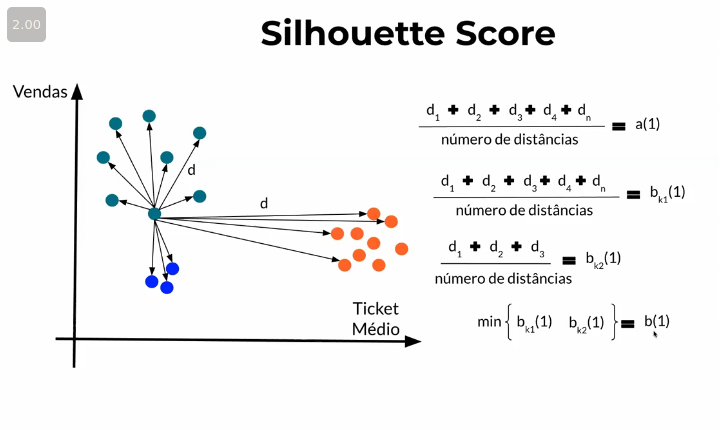
       iii.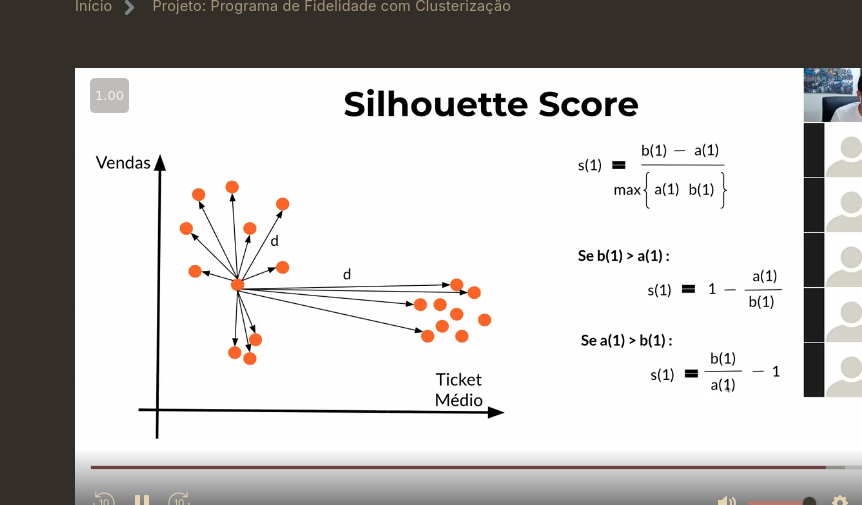
       i. Observe a fórmula, é calculado escolhendo o cluster mais próximo, por isso deve intepretar como 1 bom, significa que os cluster mais próximo do que está sendo analisado está longe., já que foi escolhido o cluster de menor de distância para ser analisado ao outro, quando dar negativo estão próximos. 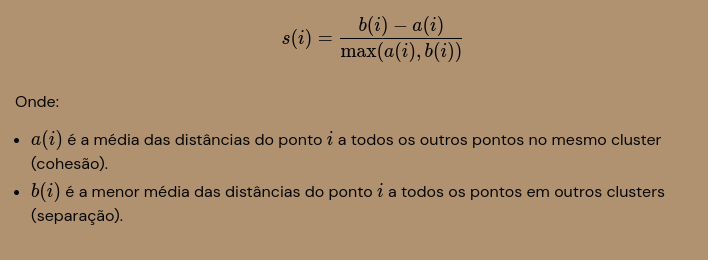
          
   3. Coesão ou compctness ( Compacidade ou proximidade entre os pontos do mesmo cluster ou conjunto.)
       i. Métrica WSS( Within-Cluster of Square - mede o quanto estão compacto os conjuntos ou cluster)
       ii. 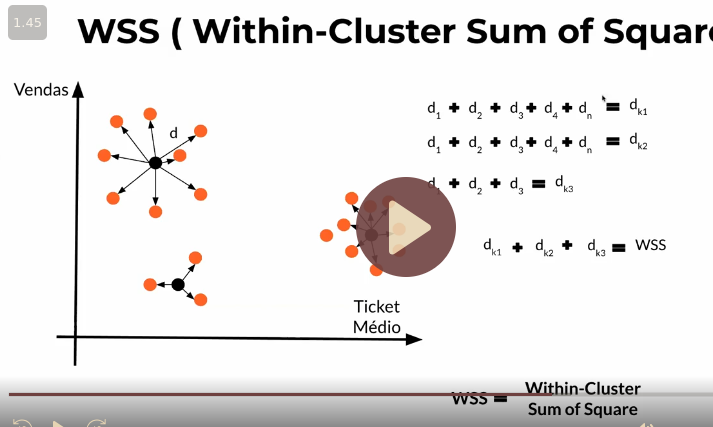
       iii. Vamos agora observar o gráfico abaixo que geramos e pelo método do cotovelo ( Elbow ) a ideia é escolher o ponto que tem maior variabilidade sem criar muitos números de cluster
      

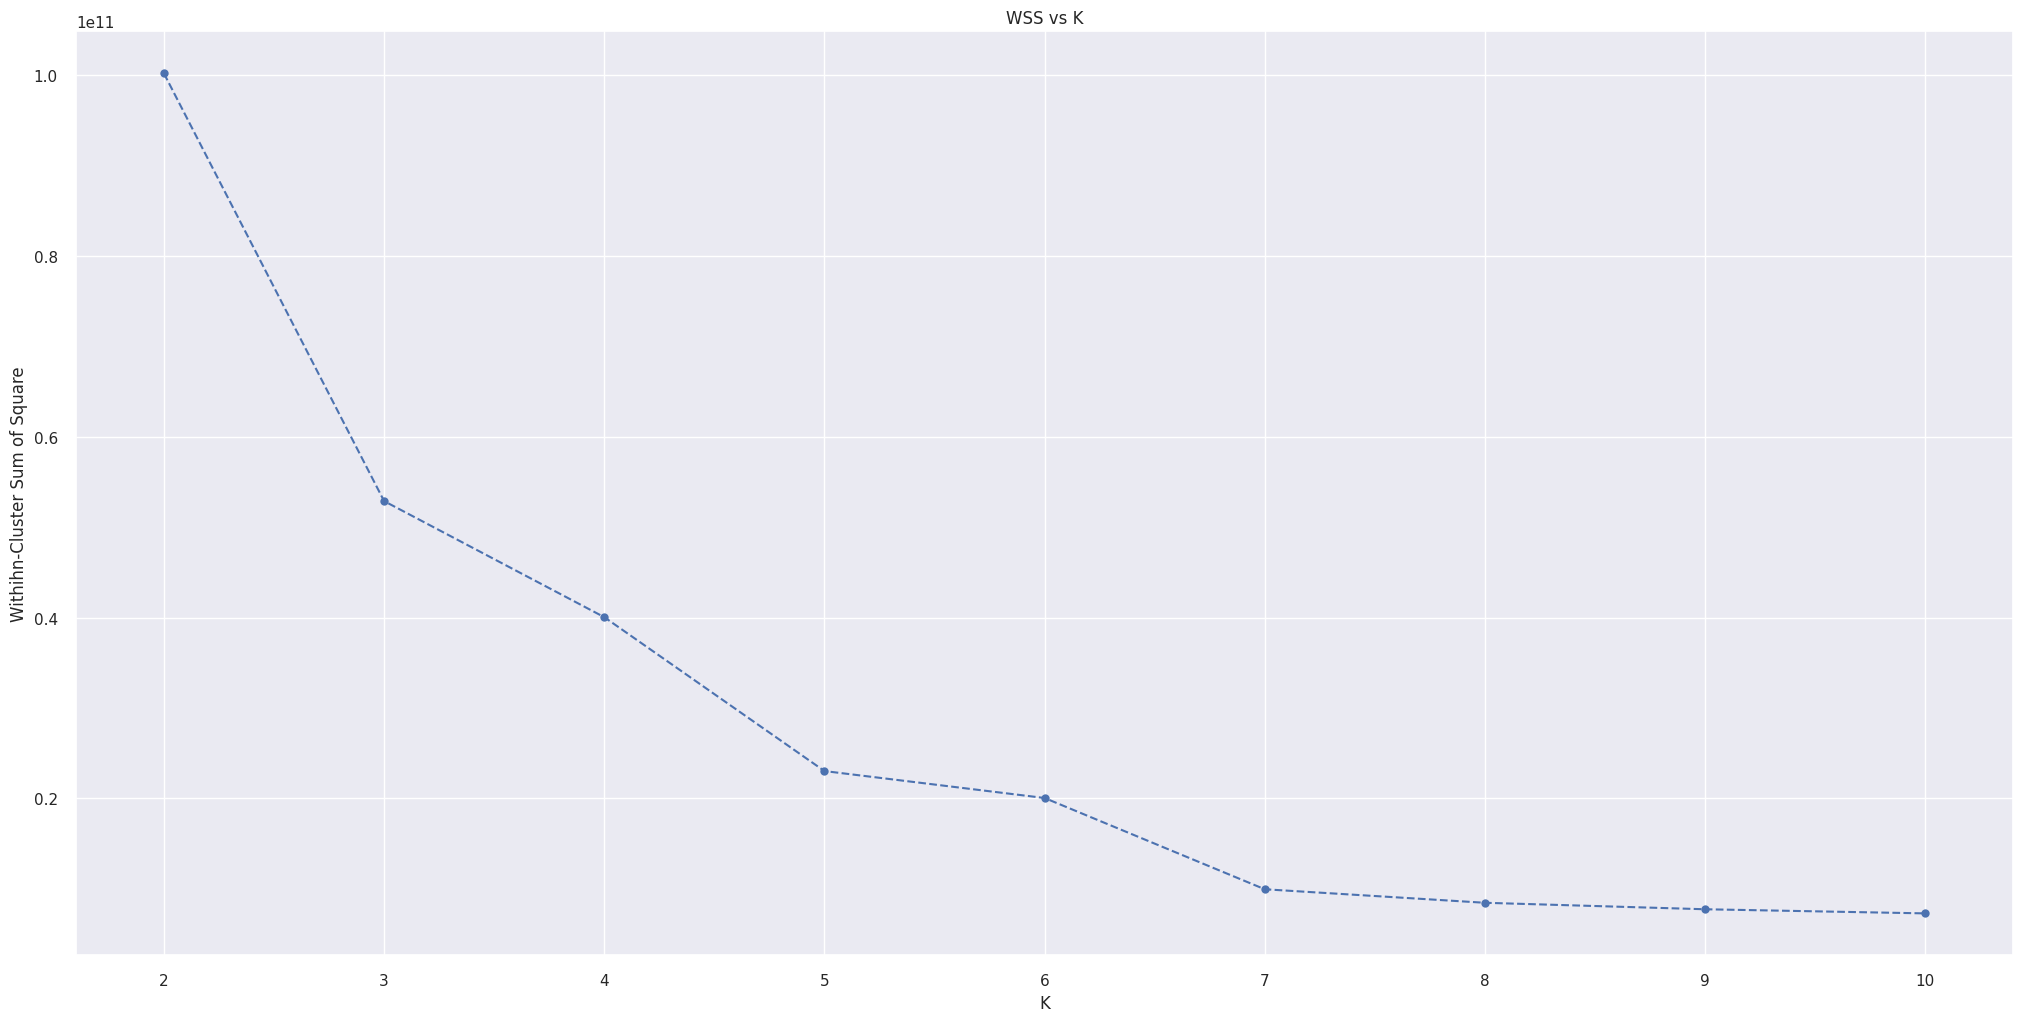

In [64]:
# Teste com o dataset RFM
X = df_reff.iloc[:,1:] # Selecionando apartir do customer_id

# Vamos testar alguns números de clusters

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
wss  = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42 )
    # model training
    kmeans.fit( X )
    # validation
    wss.append( kmeans.inertia_)

# plot wss - Elbow Method
plt.plot( clusters, wss, linestyle = '--', marker = 'o', color = 'b')
plt.xlabel( 'K')
plt.ylabel( 'Withihn-Cluster Sum of Square' );
plt.title( 'WSS vs K');



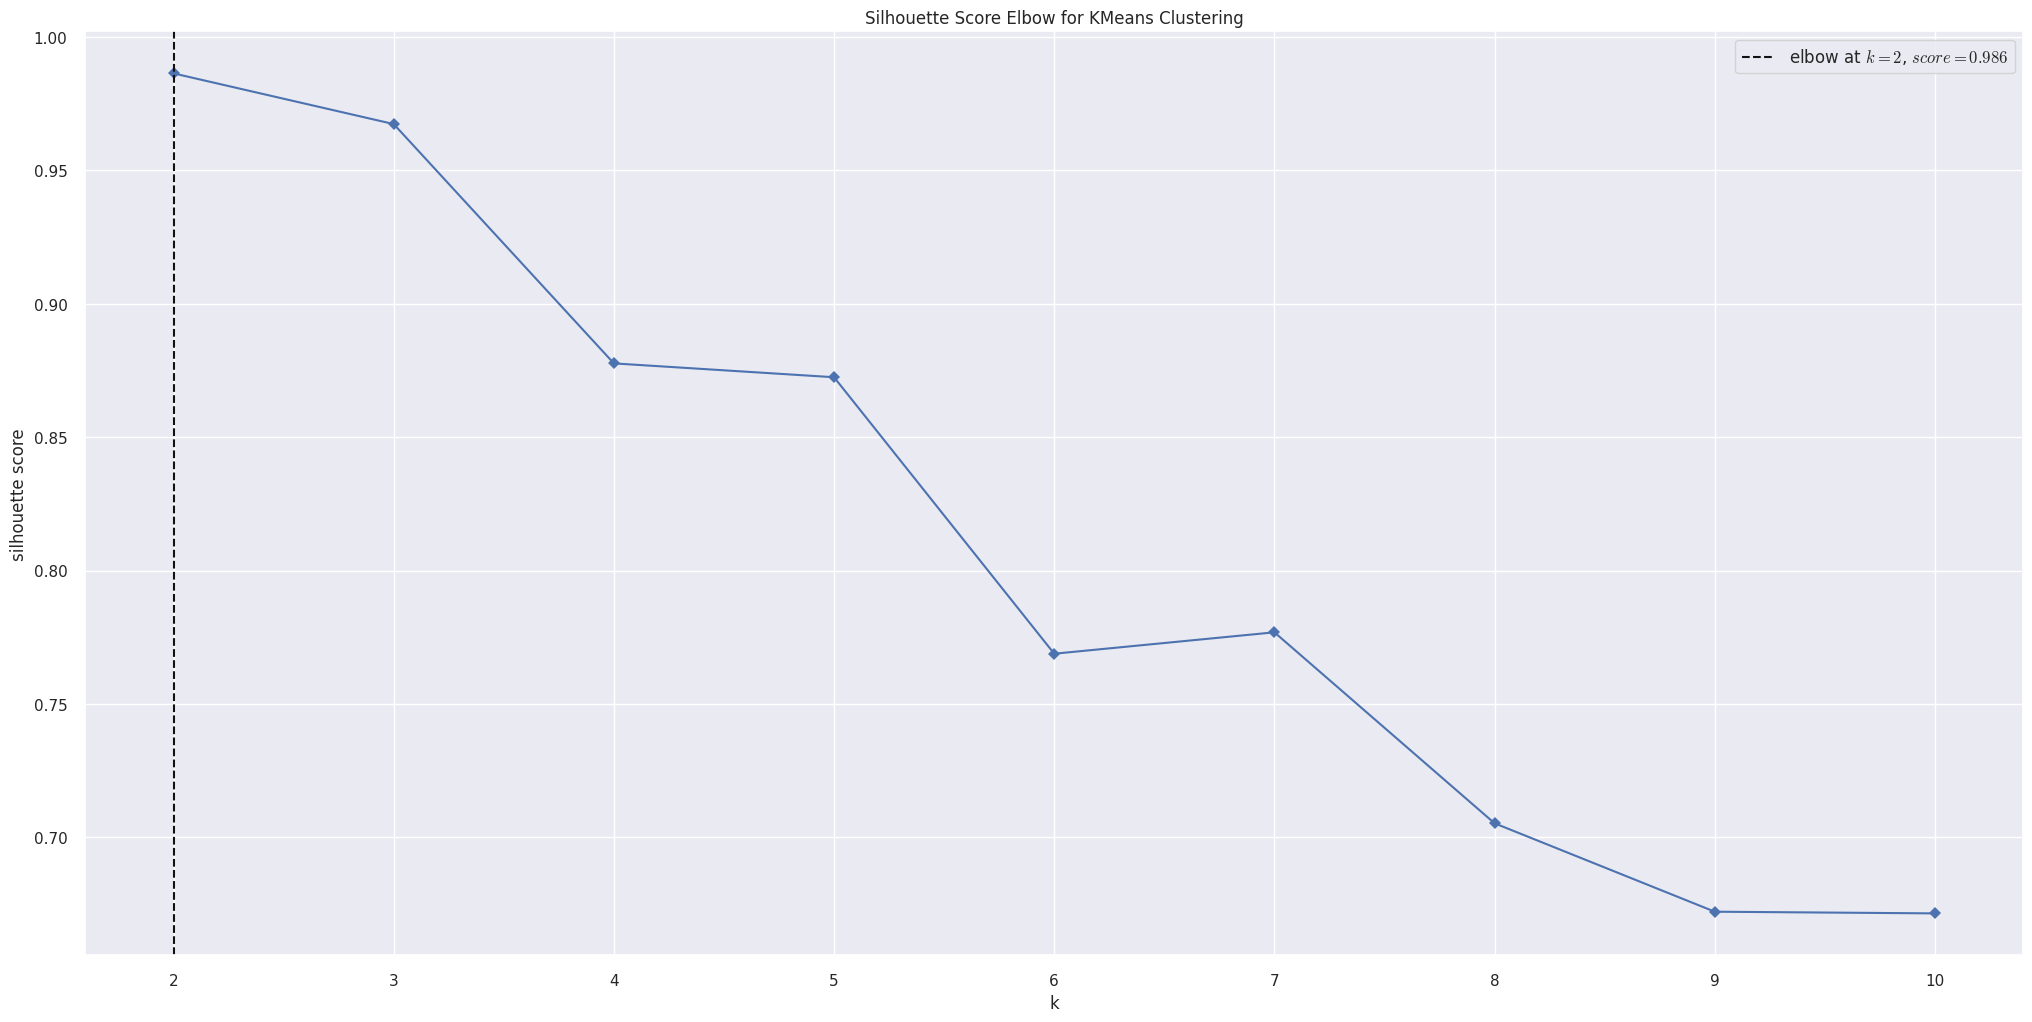

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [65]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( c.KMeans(), k = clusters, metric = 'silhouette', timings = False )
kmeans.fit( X )
kmeans.show()

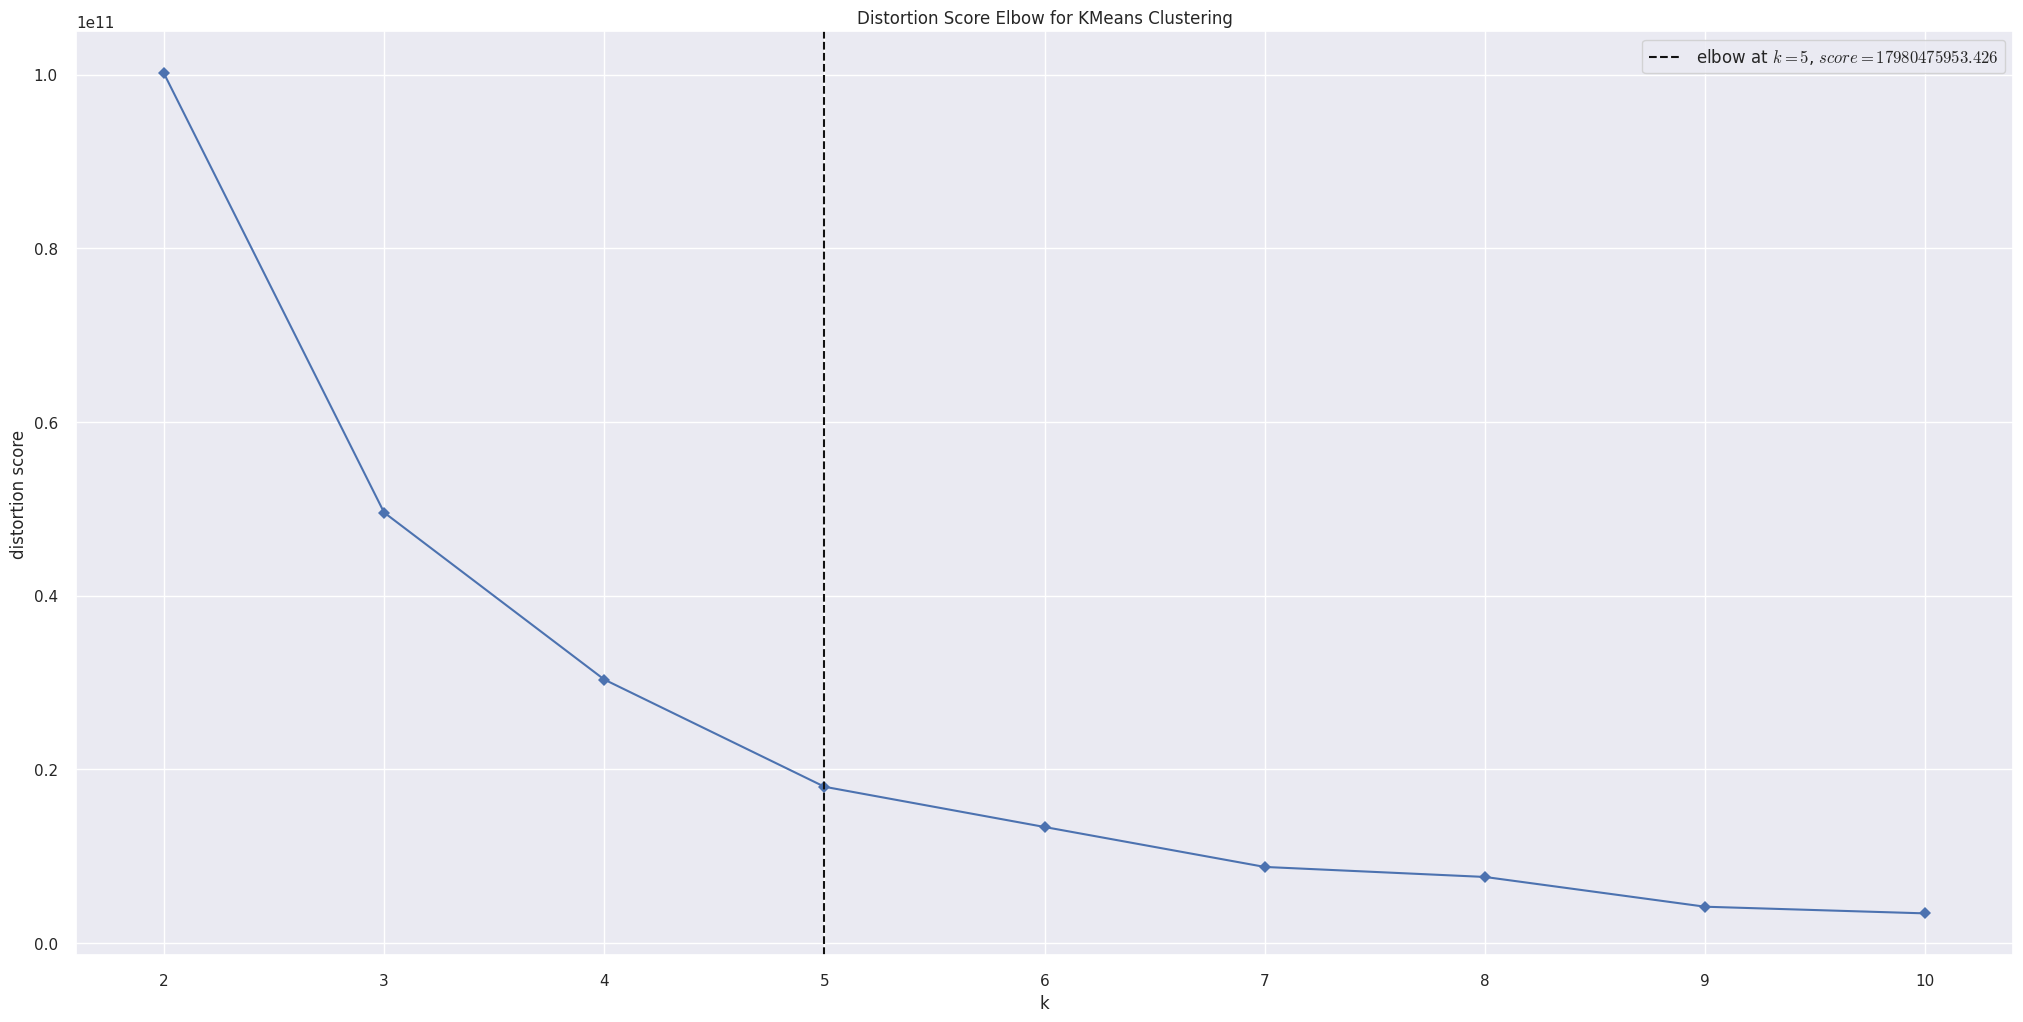

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( c.KMeans(), k = clusters, timings  = False)
kmeans.fit( X )
kmeans.show()

# 7.0.1 Shillouette Score

In [67]:


kmeans = KElbowVisualizer( c.KMeans(), k= clusters, metric = 'silhouette', timings = False)

IndexError: index 3 is out of bounds for axis 0 with size 3

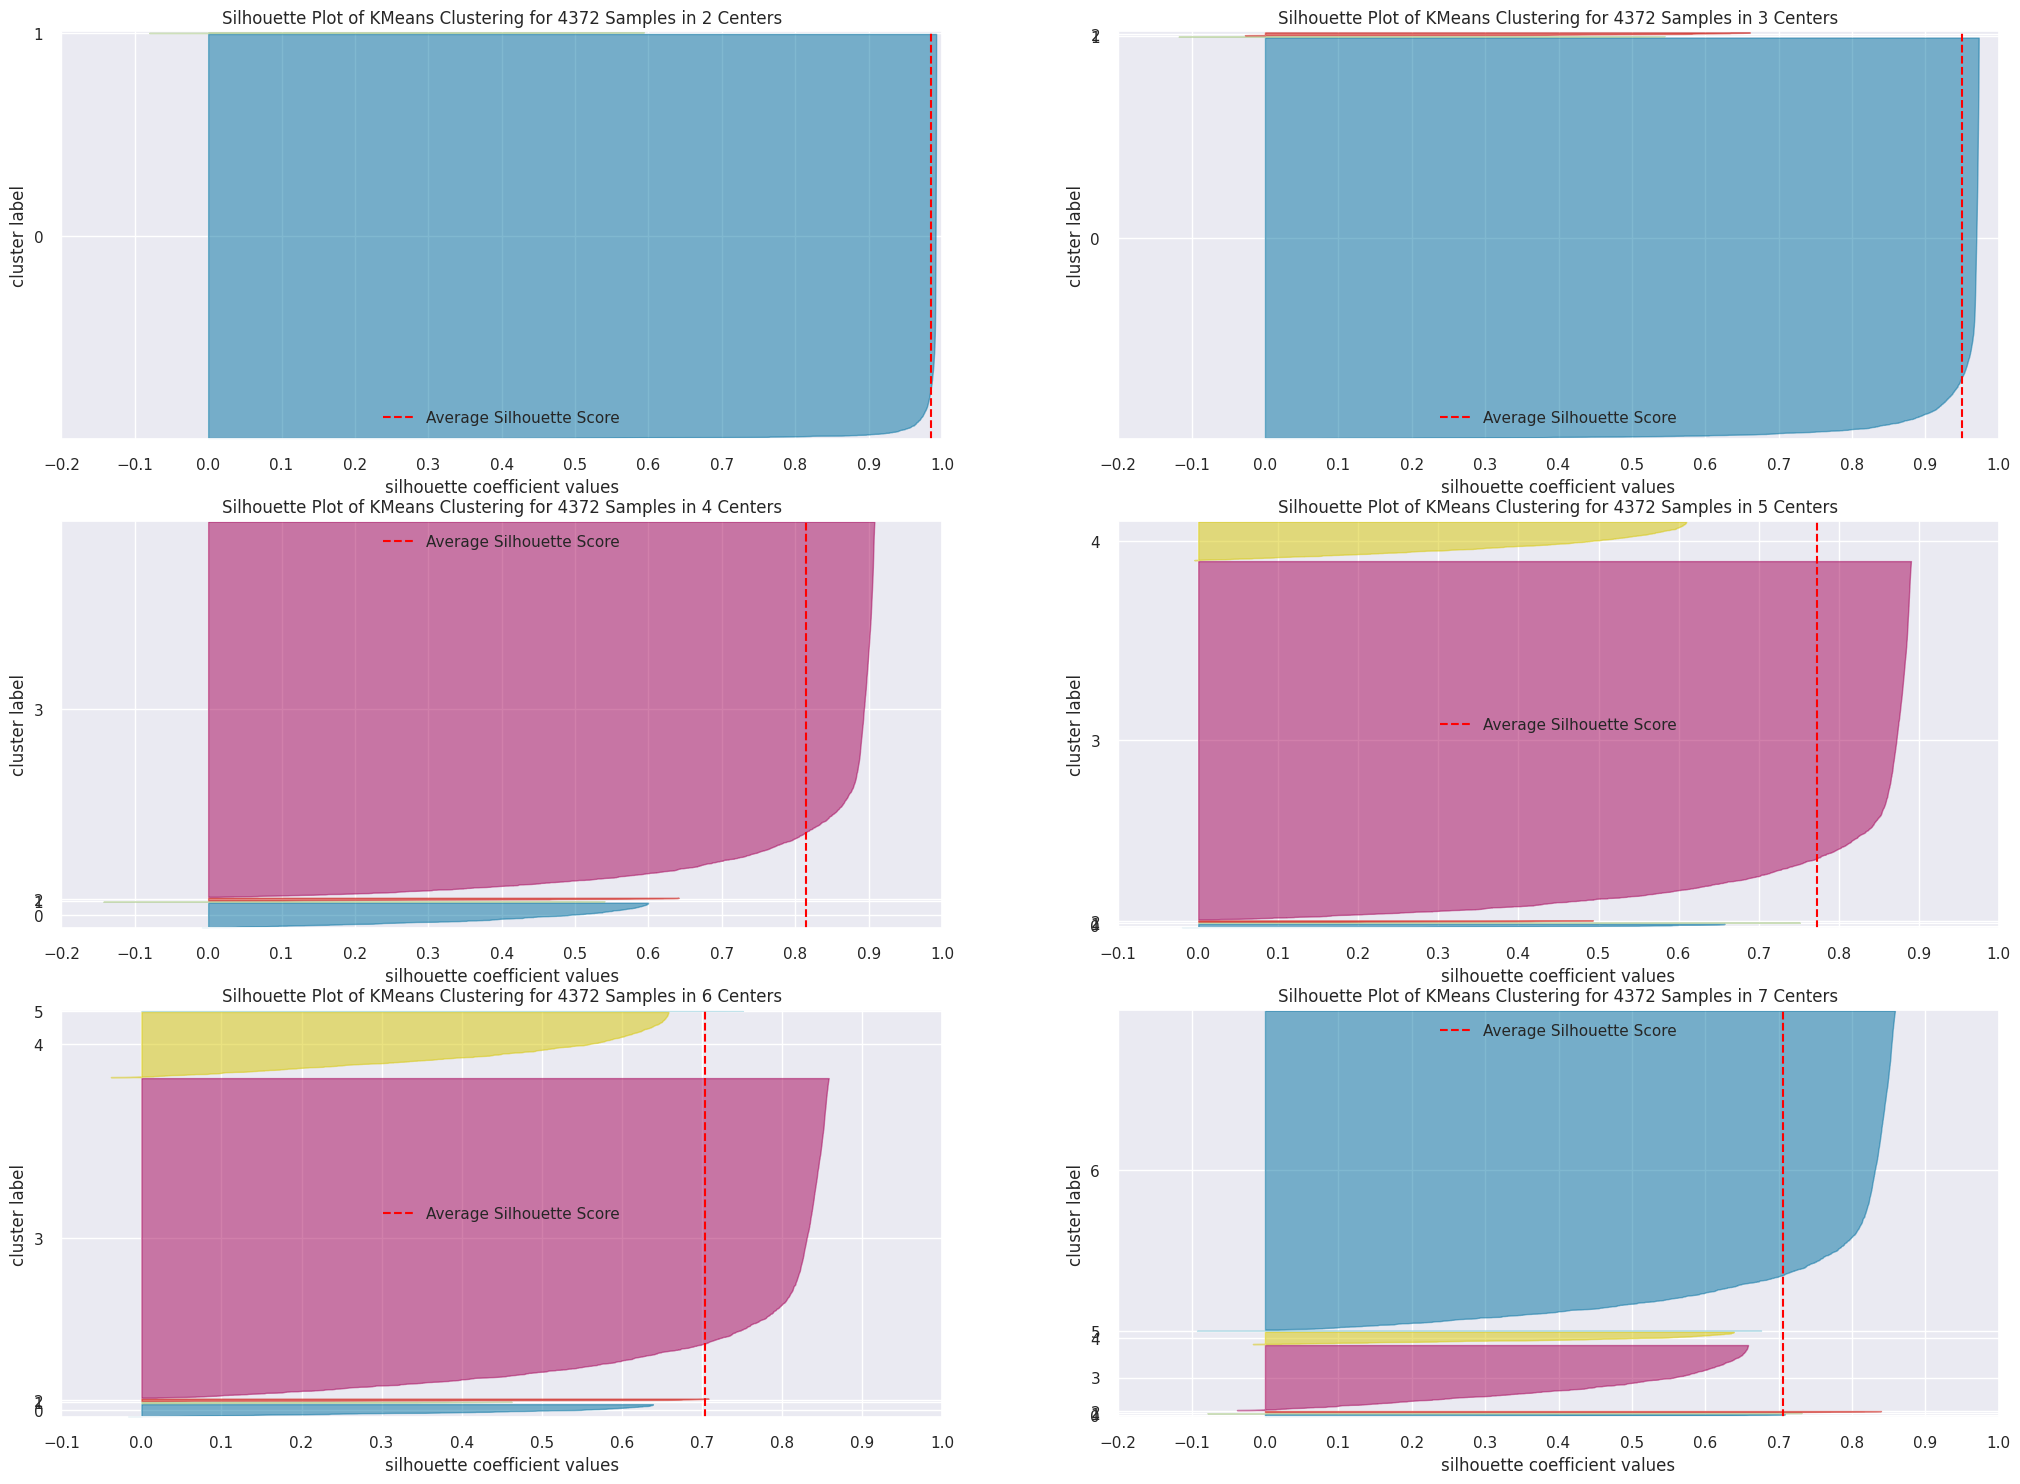

In [68]:
# Silhouette Análise
k = [2, 3, 4, 5, 6, 7, 8]
fig, ax = plt.subplots(3, 2, figsize = (25, 18 ))

for k in clusters:
    km = c.KMeans( n_clusters = k, init = 'random', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod( k, 2)

    visualizer = SilhouetteVisualizer( km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit( X )
    visualizer.finalize()


## 7.1 K-Means

In [73]:
X = df_tree.copy()


NameError: name 'df_tree' is not defined

In [ ]:
X.head()

In [ ]:
clusters = np.arange(2,25,1)

In [ ]:
kmeans_list = []
# c -/> cluster
# m -> metrics
for k in clusters:
    #model definition
    kmeans_model = c.KMeans(n_clusters=k, n_init = 100, random_state=42)

    #model training
    kmeans_model.fit(X)

    #model predict
    labels = kmeans_model.predict(X)

    #model performance 
    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    kmeans_list.append(sil)



Claro! O **silhouette score** e outras métricas são fundamentais para avaliar a qualidade de um agrupamento em algoritmos de clustering, como o KMeans. Aqui estão algumas definições e descrições de várias métricas de desempenho de cluster:

### 1. Silhouette Score
- **Definição**: O silhouette score mede a qualidade de um agrupamento, levando em conta a distância entre os pontos dentro do mesmo cluster e a distância entre pontos de clusters diferentes.
- **Intervalo**: O valor varia de -1 a +1. Um valor próximo de +1 indica que os pontos estão bem agrupados e distantes de outros clusters, enquanto valores próximos de zero indicam que os clusters estão sobrepostos. Valores negativos sugerem que os pontos podem estar agrupados incorretamente.

### 2. Davies-Bouldin Index
- **Definição**: O Davies-Bouldin Index mede a média das razões entre a soma das distâncias dos pontos a seus respectivos centróides e as distâncias entre os centróides dos clusters.
- **Objetivo**: Um índice menor sugere uma melhor separação entre os clusters, enquanto valores maiores indicam que os clusters se sobrepõem.

### 3. Dunn Index
- **Definição**: O Dunn Index define a relação entre a menor distância entre os pontos de diferentes clusters e a maior distância dentro de um cluster.
- **Objetivo**: Um valor maior do Dunn Index indica uma boa separação entre clusters e compactação dentro deles.

### 4. Calinski-Harabasz Index (ou Variância de Dunn)
- **Definição**: O Calinski-Harabasz Index, também conhecido como Índice de Variância, é a razão entre a soma das variâncias entre clusters e a soma das variâncias dentro dos clusters.
- **Objetivo**: Quanto maior o valor, melhor a densidade e a separação dos clusters.

### 5. Inertia (ou Within-cluster Sum of Squares)
- **Definição**: Esta métrica mede a soma das distâncias quadráticas entre cada ponto em um cluster e o centróide desse cluster.
- **Objetivo**: Um valor menor indica que os pontos estão mais próximos do centróide do cluster, sinalizando um melhor agrupamento. É frequentemente usada no contexto do algoritmo KMeans.

### 6. Adjusted Rand Index (ARI)
- **Definição**: O ARI é uma medida de similaridade entre dois agrupamentos (um real e um predito), que corrige o Rand Index para o acaso.
- **Intervalo**: Os valores podem variar de -1 a 1, onde 1 indica que os agrupamentos são idênticos, 0 indica que não há concordância além daquela esperada pelo acaso, e valores negativos indicam que há menos concordância do que o esperado.

### 7. Fowlkes-Mallows Index
- **Definição**: Essa é uma medida que calcula a média geométrica da precisão e do recall entre as classes preditas e verdadeiras.
- **Objetivo**: Um valor mais alto indica uma melhor concordância entre os agrupamentos.

Essas métricas podem ser usadas em conjunto para obter uma avaliação abrangente da qualidade de seus clusters. Dependendo do seu conjunto de dados e do tipo de problema, algumas métricas podem ser mais informativas do que outras. 

In [ ]:
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('Values of K')
plt.ylabel('Silhouete Score')
plt.axvline(x=20, color='g', linestyle='--')
plt.title('Silhouete Score vs K')

In [ ]:
gmm_list = []

for k in clusters:
    #model definition
    gmm_model = mx.GaussianMixture(n_components=k, random_state=42)  #define quantas guassianas eu quero


    #model training
    gmm_model.fit(X)

    #model predict
    labels = gmm_model.predict(X)

    #model performance 
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)

In [ ]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('Values of K')
plt.ylabel('Silhouete Score')
plt.axvline(x=23, color='g', linestyle='--')

plt.title('Silhouete Score vs K')

In [ ]:
#model deinition and training
hc_model = hc.linkage(X,'ward')

In [ ]:
#hc.dendrogram( hc_model, leaf_rotation=90, leaf_font_size=8)
#plt.plot()

In [ ]:
hc_list = []
for k in clusters:
    #model definition and training
    hc_model = hc.linkage(X,'ward')
    
    #model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    #metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

In [ ]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')

In [ ]:
df_results = pd.DataFrame({'KMeans': kmeans_list, 'GMM': gmm_list, 'HC': hc_list}).T
df_results.columns = clusters
df_results.style.highlight_max(color='lightgreen', axis=1)


In [ ]:
import matplotlib.pyplot as plt

# Supondo que clusters, hc_list, kmeans_list e gmm_list já estejam definidos e preenchidos

plt.figure()

# Adicionando legendas para cada plot usando o parâmetro 'label'
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b', label='Hierarchical Clustering')
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='r', label='KMeans')
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='g', label='Gaussian Mixture Model')

# Criação da legenda com os rótulos definidos
plt.legend()

# Exibindo o gráfico
plt.show()


# 8.0 Model Training

## 8.1 k-Means

In [69]:
# Model definition 
k = 4 
kmeans = c.KMeans( init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42 )

#model training 
kmeans.fit( X )

# Clustering (classificar)
labels = kmeans.labels_

## 8.2 Cluster Validation

In [70]:
# WSS ( Within-cluster sum of square)
print('WSS value: {}'.format(kmeans.inertia_))
#SS
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 40056506734.6025
SS value: 0.8139972028952444


# <font color = 'red' > 9.0 Cluster Analysis </font>

In [71]:
df9 = df_reff.copy()
df9['cluster'] = labels
df9.head()

customer_id  gross_revenue  recency_days  invoice_no  avg_per_purchase  cluster
0      17850.0        5288.63           302          35         16.950737        0
1      13047.0        3079.10            31          18         15.709694        3
2      12583.0        7187.34             2          18         28.634821        0
3      13748.0         948.25            95           5         33.866071        3
4      15100.0         635.10           330           6        105.850000        3

In [72]:
df9['cluster'].unique()

array([0, 3, 2, 1], dtype=int32)

In [73]:
print(df9.isnull().sum())


customer_id         0
gross_revenue       0
recency_days        0
invoice_no          0
avg_per_purchase    0
cluster             0
dtype: int64


##  9.1 Visualization Inspection

In [74]:
visuaizer = SilhouetteVisualizer( kmeans, colors = 'yellowbrick')
visualizer.fit( X )
visualizer.finalize()

/home/win/.cari/venv/jupyter/4.2.4/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


##  9.2 2d plot

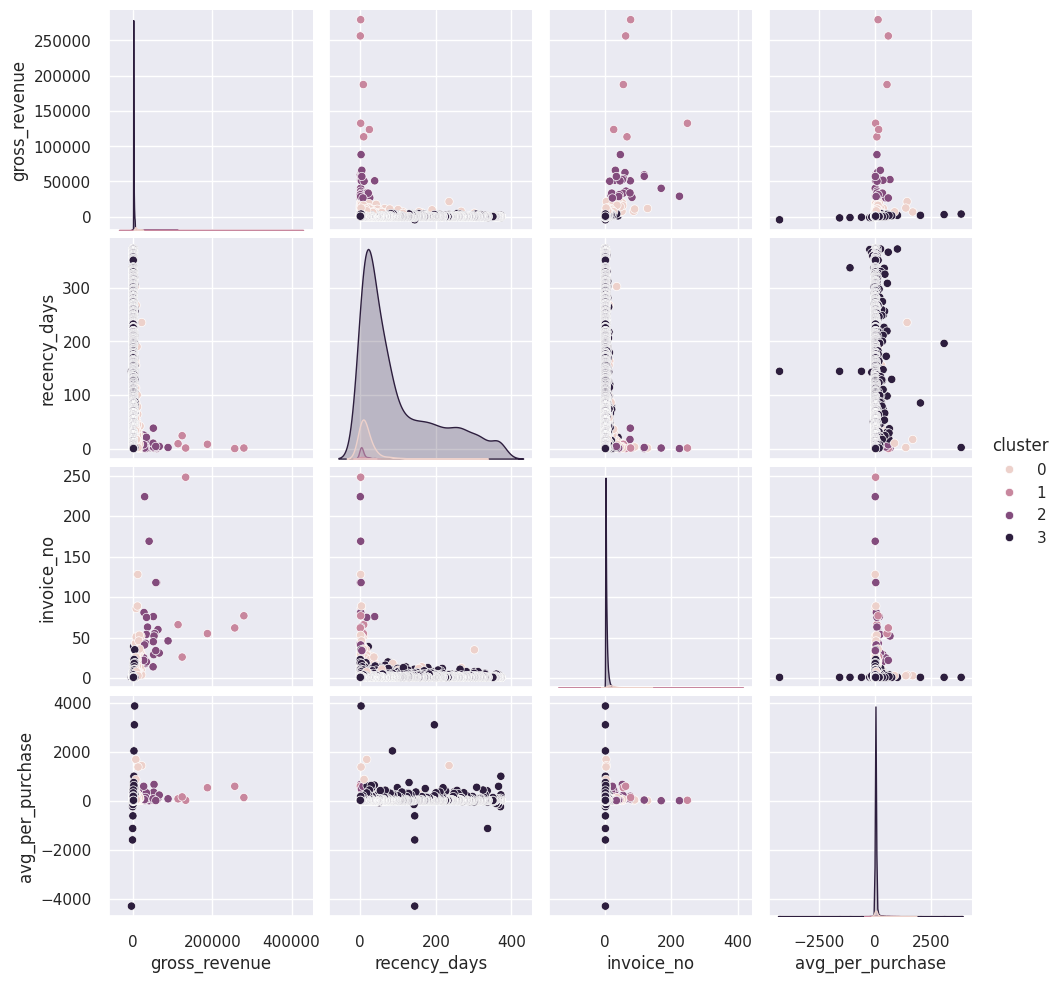

In [75]:
df_viz = df9.drop( columns = 'customer_id', axis = 1)
sns.pairplot( df_viz, hue = 'cluster' )

## 9.3 UMAP -t-SNE
o UMAP funciona muito bem quando tem muitos dados, o objetivo dele é reduzir a dimensionalidade. 
É igual há história do mundo plano, pega algo em três e leva para lá. 

T-SNE mesmo sendo, mais preciso, ele faz outras otimizações que deixa mais pesado.
# Machine Learning - Manifold

Objetivo: Redução de dimensional
PCA - Matrix, Espaço de distância (Espaço Hilbert) - 9 condições - Colorários

UMAP, t-SNE ( 2009 ) - Manifold - Topologia (gráfico igual tela de descanso)

In [78]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


/home/win/.cari/venv/jupyter/4.2.4/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

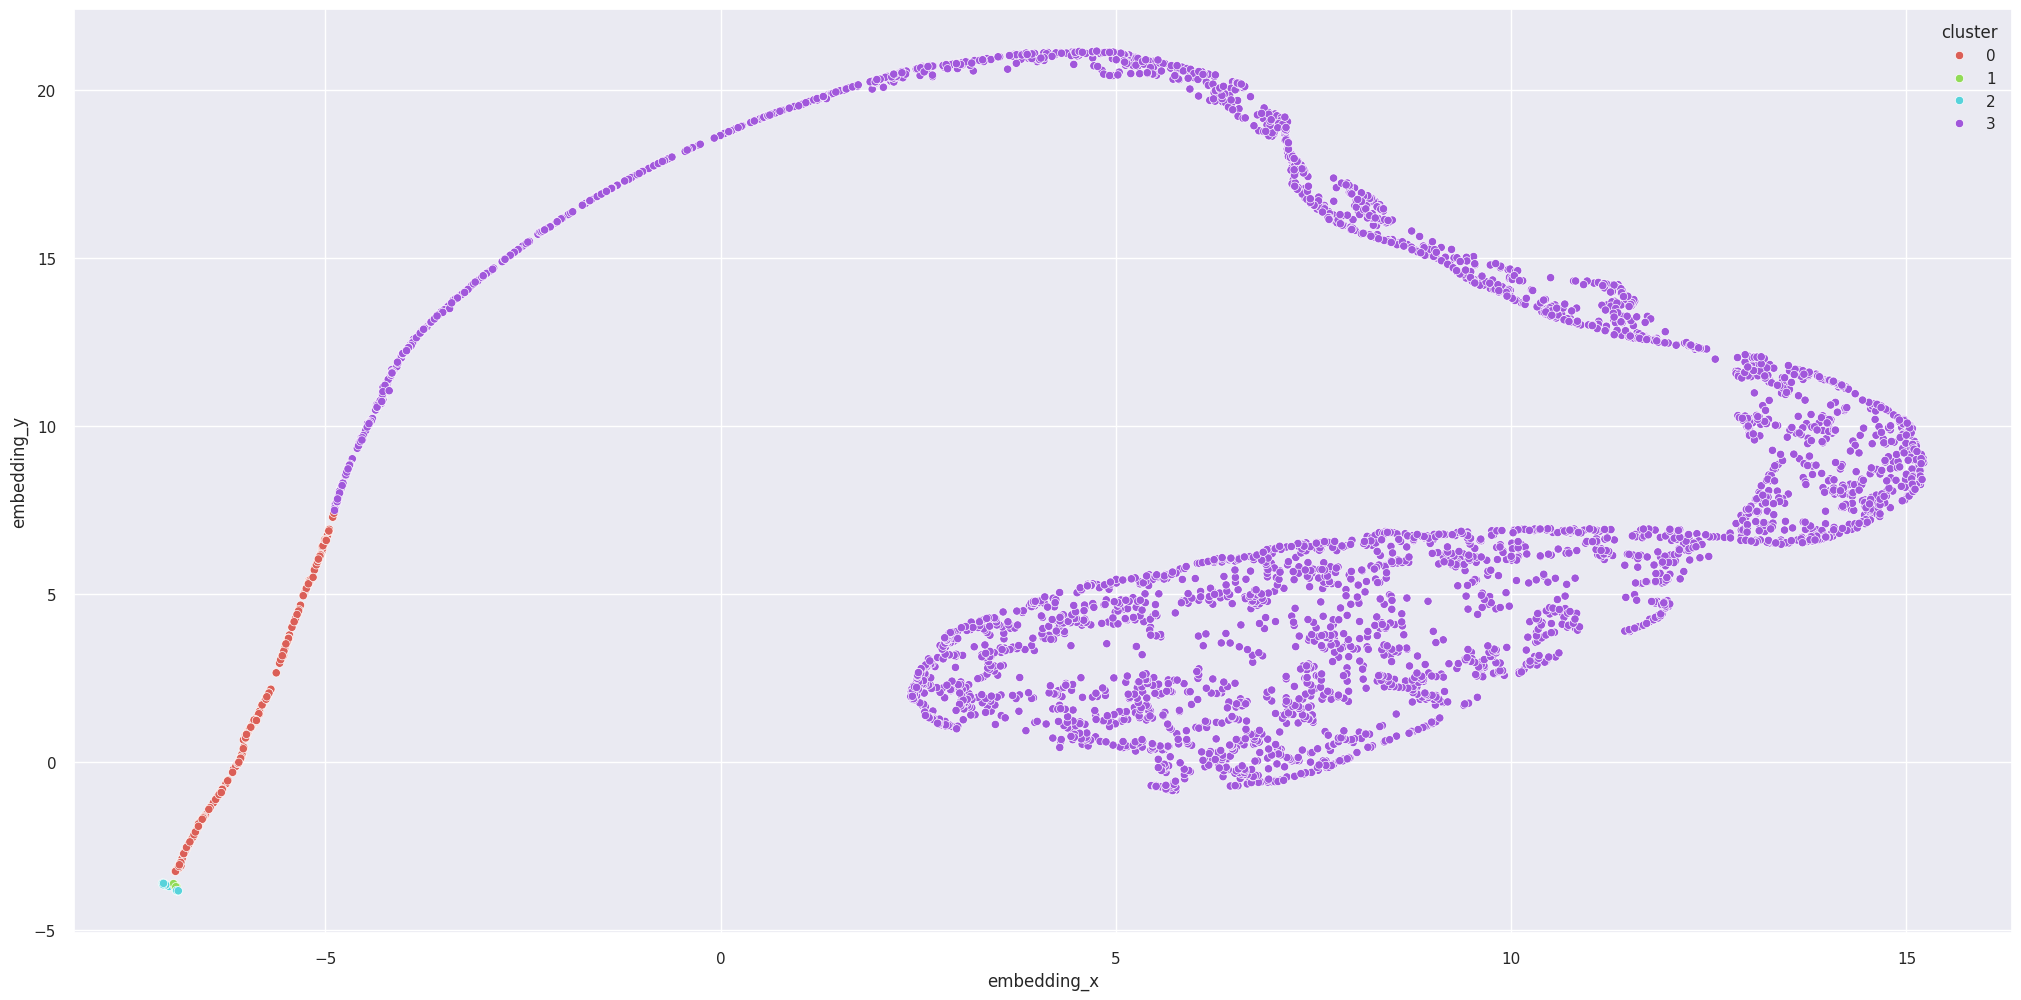

In [81]:
reducer   = umap.UMAP( n_neighbors = 50, random_state = 42 ) # Quando menor os n_neighbors ele olha + para os vizinhos locais 
embedding = reducer.fit_transform( X )
# Embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# Plot UMAP 
sns.scatterplot( x   = 'embedding_x', y = 'embedding_y', 
                  hue = 'cluster',
                  palette = sns.color_palette( 'hls', n_colors = len(df_viz['cluster'].unique())), 
                  data =df_viz )

##  9.1 Visualization Inspection

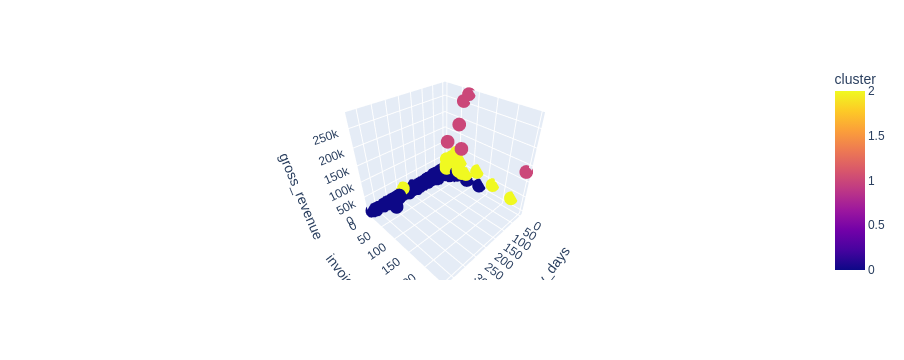

In [42]:
#figura = px.scatter_3d( df9, x = 'recency_days', y = 'invoice_no', z = 'gross_revenue', color = 'cluster')
#figura.show()

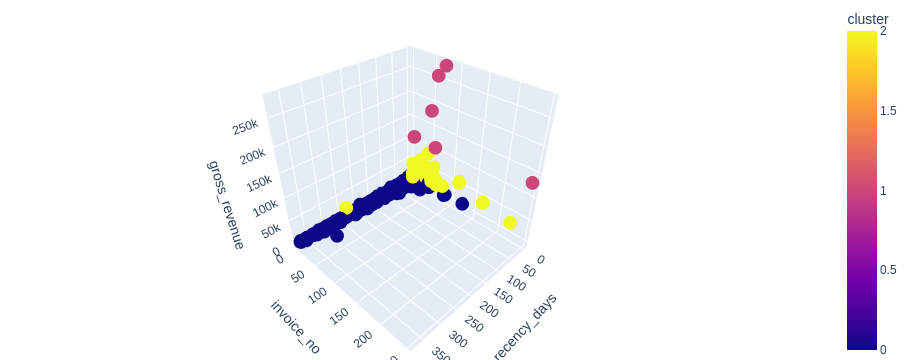

In [43]:
figura.update_layout(margin=dict(l=0, r=0, b=0, t=0))
figura.show()


## 9.2 Cluster Profile

In [82]:
# Beleza observado gráfico, vamo# s descrever o perfil dos clientes.
#Number customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())


# Avg Gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')
#Avg recency days
df_avg_recency_days = df9.groupby('cluster').recency_days.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')


#Avg invoice_no
df_invoice_no = df9[['invoice_no', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how='inner', on='cluster')

# Avg Ticket ou melhor avg_per_puchase
df_purchase = df9[['avg_per_purchase', 'cluster']].groupby( 'cluster').mean().reset_index()
df_cluster  = pd.merge( df_cluster, df_purchase, how = 'inner', on = 'cluster' )
df_cluster
# Avg incoice_no

cluster  customer_id  perc_customer  gross_revenue  recency_days  invoice_no  avg_per_purchase
0        0          267       6.107045    8089.028652     20.280899   19.528090         62.783157
1        1            6       0.137237  182181.981667      7.166667   89.000000        253.626345
2        2           28       0.640439   42614.387143      6.178571   57.821429        162.862605
3        3         4071      93.115279     946.696250     96.969295    3.641120         25.359654

**Cluster 01: (Candidato à Insider )**

- Número de customers: 6 ( 0,14% dos customers)
- Recêncy em média   : 7 dias
- Compras em média   : 89 compras
- Receita em média   : $182.182,00 Doláres

**Cluster 02:**

- Número de customers: 31 ( 0,71% dos customers)
- Recência em média  : 14 dias
- Compras em média   : 53 compras
- Receita em média   : $ 40.543,52 Dólares
 
**Cluster 03:**

- Número de customers: 4.335 ( 99,15 % dos customers)
- Recência em média  : 92 dias
- Compras em média   : 5 compras
- Receita em média   : $ 1.372,57 Dólares
 



In [ ]:
df10 = df92

H1. Os clientes do cluster insiders possuem um volume de compra de produtos acima de 10% do totatl de compras

verdadeiro: O cluster insider possui um volume de compra de 54%

In [ ]:
#df10[df10['cluster'] ==1].groupby('cluster').qtde_products.sum().reset_index()

#sum the quantity of products of insiders
df_sales_insiders = df10[df10['cluster'] == 6].qtde_products.sum() #substituir depois o cluster correspondente ao insiders
df_sales_total = df10.qtde_products.sum()

#percentage of sales of insiders by the total product sales
print('% Sales Insiders: {:.2f}'.format(100*df_sales_insiders/df_sales_total))


H2. Os clientes do cluster insiders possuem um volume de faturamento de compras acima de 10% do total de compras

verdadeiro: O cluster insider possui um volume de gmv de 52%


In [ ]:
#sum the gmv of insiders
df_gmv_insiders = df10[df10['cluster'] == 6].gross_revenue.sum() #substituir depois o cluster correspondente ao insiders
df_gmv_total = df10.gross_revenue.sum()

#percentage of sales of insiders by the tot/al product sales
print('% Sales Insiders: {:.2f}'.format(100*df_gmv_insiders/df_gmv_total))


H3. Os clientes do cluster insiders tem numero de devolução médio abaixo do media da base total de clientes

Falso: O cluster insiders tem a média de devolução acima da média geral


In [ ]:
df_avg_return_insiders = df10[df10['cluster'] == 6].qtde_returns.mean()
df_avg_return_total = df10.qtde_returns.mean()

print('Avg Return insiders: {} vs Avg Returns total: {}'.format(np.round(df_avg_return_insiders, 0),
                                                               np.round(df_avg_return_total, 0)))




H4. A mediana do faturamento pelos clientes do cluster insider é 10% do que a mediana do faturamento geral

verdadeiro: A mediana do faturamento é 279% acima da mediana


In [ ]:
#mediana de gmv do insiders
df_median_gmv_insiders = df10[df10['cluster'] == 6].gross_revenue.median()

#mediana de gmv do total
df_median_gmv_total = df10.gross_revenue.median()

gmv_diff = (df_median_gmv_insiders - df_median_gmv_total) / df_median_gmv_total
print('Median Diff: {:.2f}%'.format(100*gmv_diff))


In [ ]:

H5. O GMV dos clientes insiders está concentradas no 3 quartil

Falso: O faturamento do cluster insiders esta concentrada no quartil 1


In [ ]:
np.percentile(df10[df10['cluster'] == 3].gross_revenue, q=0.1)

In [ ]:
np.percentile(df10[df10['cluster'] == 3].gross_revenue, q=0.9)

In [ ]:
df_aux = (df10[(df10['cluster'] == 3) & 
               (df10['gross_revenue'] < 10000)]
               .gross_revenue)
sns.boxplot(x=df_aux)

In [ ]:
df_aux = (df10[(df10['cluster'] == 3) &
               (df10['gross_revenue'] < 10000)]
               .gross_revenue)
sns.violinplot(x=df_aux)